<a href="https://colab.research.google.com/github/michellekan/smt203/blob/main/Lab2/Lab2_Twitter_API_ver2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Twitter API (v2)

In this lab, you will learn how to retrieve tweets data from Twitter by using an open source library called [Tweepy](https://docs.tweepy.org/en/latest/). Tweepy gives you a very convenient way to access the Twitter API with Python.  

Also, check the official [Twitter API](https://developer.twitter.com/en/docs/twitter-api/getting-started/guide).

This lab is written by Michelle KAN (michellekan@smu.edu.sg) and Jisun AN (jisunan@smu.edu.sg). 

Let's first install the tweepy library:<br>

In [ ]:
## This it OPTIONAL if you are running the current notebook using Google Colab
!pip install tweepy

In [71]:
# Add Google Drive as an accessible path (Optional if you are running from Jupyter Notebook)
from google.colab import drive
drive.mount('/content/drive')

# change path to the designated google drive folder
# otherwise, data will be saved in /content folder which you may have issue locating
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


## 1) Authentication

The following code imports the tweepy library and other required libraries. Twitter API uses the [tweepy.AuthHandler](https://docs.tweepy.org/en/v3.5.0/auth_tutorial.html) class for authentication. 

In [2]:
import tweepy
from tweepy import OAuthHandler

Before using the Twitter API, you will need a Twitter account, and to have obtained Twitter API authentication credentials.<br>Set your authentication credentials below. <br>

In [3]:
# Consumer/Access key/secret/token obtained from Twitter
# You should have created a Twitter app and gotten these keys.
# Do NOT share your key/secret/token with other students.
consumer_key    = ''
consumer_secret = ''
access_token    = ''
access_secret   = ''


In [4]:
consumer_key    = '1X4O2pwAII4uuazGFnbFUmEyG'
consumer_secret = 'lCh8cJHsSEsdoFwkHev9Yog57NOfcfe0Dck0XK5XLvbgbbkK9X'
access_token    = '1347176054184574976-EHMScHDG6zr5KevYPcfoTi2RBejw3Z'
access_secret   = 'QHsmsona0mBnEVqtUOUSFI4qxlNqzIvISCTpk2p89AMz6'

The following code creates an authorization object with your above authentication info and calls the Twitter's API.

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# This line finally calls Twitter's Rest API.
api = tweepy.API(auth)
#api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# The following codes verify if the authentication is successful
# If all goes well, you should see a message saying Authentication OK.
# Otherwise, check your Consumer/Access key/secret/token
try:
    api.verify_credentials()
    print("Authentication OK")
except Exception as e:
    print("Error during authentication:", e)


Authentication OK


## 2) Types of Twitter API & Tweepy Cursor

### 2-1) Twitter REST API

The REST API is to pull data from Twitter. 

We can retrieve tweets based on query or tweets of all users using `tweepy.Cursor.` 

`tweepy.Cursor` method deals with the pagination -- if there's many tweets returned, it makes it easy to iterate the data.


#### a) Search tweets using Keywords

Below will return five tweets containing search words 

```
search_words = 'covid'
max_tweets = 5
tweets = tweepy.Cursor(api.search, q=search_words, tweet_mode='extended').items(max_tweets)
```


#### b) Users tweets

Below will return 5 tweets posted by BillGates

```
username = 'BillGates'
max_tweets = 5
tweets = tweepy.Cursor(api.user_timeline, id=username, tweet_mode='extended').items(max_tweets)
```


### 2-2) Streaming API tweets
The Twitter streaming API is used to download twitter messages in real time. It is useful for obtaining a high volume of tweets, or for creating a live feed using a site stream or user stream. See the [Twitter Streaming API Documentation](https://developer.twitter.com/en/docs/tweets/filter-realtime/overview).

```
keyword = 'covid'
myStream.filter(track=[keyword])
```





## 3) Search Tweets

Now you are ready to search Twitter for recent tweets! 



### a) Search Tweets using Keywords


To create this query, you will define the:
- Search term 
- start date of your search (optional)
 
Note: Search API returns tweets with specific search terms, posted in the last 7 days. You need a premium account for going further than 7 days.

(Optional) Uncomment and run the following code snippet if you wish to enable Python logging to know what's happening underlying in the API call.

In [ ]:
# import logging
# logging.basicConfig(level=logging.DEBUG,
#                     format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
#                     datefmt='%m-%d %H:%M:%S')
# logger = logging.getLogger(__name__)

In [7]:
# Define the search term and the date_since date as variables
search_words = 'covid'
date_since = "2021-08-29" #if you want to collect data from yesterday

max_tweets = 5

Below we use `tweepy.Cursor()` to search for tweets containing the specified search_words and perform pagination. Parameters:
-   `api.search` – tweepy api method that returns a collection of relevant Tweets matching a specified query
- 	`q` – the search query string of 500 characters maximum, including operators. Queries may additionally be limited by complexity.
-   `lang` – restricts tweets to the given language
-   `since` – returns tweet created on or after this date. Date should be formatted as YYYY-MM-DD.

You can restrict the number of tweets returned by specifying a number in the `.items()` method. `.items(5)` will return 5 of the most recent tweets

In [ ]:
# Below will return five tweets containing search words 
tweets = tweepy.Cursor(api.search, q=search_words, tweet_mode='extended').items(max_tweets)


In [31]:
# You can add other parameters like lang, since, etc) 
tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since,tweet_mode='extended').items(max_tweets)

`tweets.Cursor()` returns an object `ItemIterator` that you can iterate to access the tweet data collected. Each tweet item in the iterator has various attributes including:

- the text of the tweet
- the date the tweet was sent
- creator of the tweet
- location where the tweet is created
- and more. 

The code below loops through the object and prints the text associated with each tweet.

In [32]:
tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(max_tweets)

# Iterate tweets
for tweet in tweets:
    # print out user's screen name & tweet text
    print("----------------------------------------------------")
    print ('Tweet ID ' + str(tweet.id))
    print (f'Tweeted by: @{tweet.user.screen_name}, Created at: {str(tweet.created_at)}, Location: {tweet.user.location}' )

    # Extracting tweet text when in Extended Mode
    try: # If it's Retweet
        text = tweet.retweeted_status.full_text
    except AttributeError:  # Not a Retweet
        text = tweet.full_text
    print('\t Tweet: ' + text)


----------------------------------------------------
Tweet ID 1432351468611424260
Tweeted by: @gooey5000, Created at: 2021-08-30 14:36:16, Location: 
	 Tweet: JUST IN - Corona not likely cause of death in 80 percent of official covid deaths reported in Germany since early July, according to Prof. Dr. Bertram Häussler, head of the independent health research institute IGES in Berlin (WELT)
----------------------------------------------------
Tweet ID 1432351468581969923
Tweeted by: @NightingaleKen, Created at: 2021-08-30 14:36:16, Location: Kitchener, Ontario, Canada
	 Tweet: A 3000% increase in expected teenage male myocarditis cases are observed following covid-19 vaccination. 

CAUTION: The actual cases are likely a gross underestimate based on baseline myocarditis rates in the USA and the limited number of doses in this group! https://t.co/Bsh3GD1qr4
----------------------------------------------------
Tweet ID 1432351468221186051
Tweeted by: @_tikna_, Created at: 2021-08-30 14:36:1

<img align="left" src="https://docs.google.com/uc?id=1IegynNxVgb3GxQoXFD_HPJMRJcx8Rlmk" width="50" style="vertical-align:middle;margin:0px 5px"/><br>Note that **user locations** are manually entered into Twitter by the user. Thus, you will see a lot of variation in the format of this value.<br>

You can access a wealth of information associated with each tweet. Try to include other items available by checking out the [twitter developer documentation](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet).


#### **Save Tweets in a JSON format into a File**


Twitter API has limits in how many times we can call APIs to collect the data (Twitter Rate Limit). So, it's always better to save the data in the file. 

__What is JSON?__

JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object notation syntax.
- Data is in key-value pairs
- Data is separated by commas
- Curly braces hold objects
- Square brackets hold arrays

Table / Database --> Text format

| id        | name           | tweet  |
| ------------- |:-------------:| -----:|
| 123      | Jisun | Hello |
| 456      | Michelle      |  Welcome |

JSON 
`[{"id":123,"name":"Jisun","tweet":"Hello"},{"id":456,"name":"Michelle","tweet":"Welcome"}]`

Other examples of JSON format:<br>
`{"code":"SMT203","desc":"CSS","num_of_students":46}`<br>
`{"code":"SMT203", "desc":"CSS", "students":{"qty":46, "school":"SCIS"}}`<br><br>

We can use `json.dumps()` to save json objects in string format into a file, while `json.loads()` reads in a string (e.g., from a jsons file) and returns a json object.

<img align="middle" src="https://docs.google.com/uc?id=1m8uElP-ak8FeUNlhpQ6xBO_Fwx4Zitv4" width="450"/>



In [19]:
import json

In [23]:
# set location for files to be saved
mypath = "."

tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(max_tweets)
# Write data into a file
filename = f"{mypath}/tweets_{search_words}.jsons"

with open(filename, "w") as output:
    for tweet in tweets:
        myjson = tweet._json
        output.write(json.dumps(myjson)+"\n")


Read tweets from the file.

Let's read the first tweet.

In [24]:
# Read data from a file
filename = f"{mypath}/tweets_{search_words}.jsons"

with open(filename) as fi:
    for line_cnt, line in enumerate(fi):
        tweet_json = json.loads(line.strip())
        break # Break here so that we read the first line of the file
        

In [25]:
# Print JSON formated text in pretty way
import pprint

pprint.pprint(tweet_json)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Aug 30 14:26:02 +0000 2021',
 'display_text_range': [0, 280],
 'entities': {'hashtags': [{'indices': [191, 219],
                            'text': 'KyawMoeTunRepresentsMyanmar'},
                           {'indices': [221, 245],
                            'text': 'WhatsHappeningInMyanmar'},
                           {'indices': [246, 256], 'text': 'Aug30Coup'}],
              'media': [{'display_url': 'pic.twitter.com/flEKuMbtgf',
                         'expanded_url': 'https://twitter.com/2021Revtweets/status/1432346174648766482/photo/1',
                         'id': 1432346034471006209,
                         'id_str': '1432346034471006209',
                         'indices': [257, 280],
                         'media_url': 'http://pbs.twimg.com/media/E-C3ISQVcAEYVCY.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/E-C3ISQVcAEYVCY.jpg',
                         'sizes': {'large

In [26]:
# Check keys in json
tweet_json.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [28]:
# How to access values in json
print(tweet_json['id'])
print(tweet_json['user']['name'])

1432348892490838017
pyae21
pyae212


#### Extract data from json

In [30]:
# Read data from a file
mypath= "."
filename = f"{mypath}/tweets_{search_words}.jsons"

with open(filename) as fi:
    for line_cnt, line in enumerate(fi):
        tweet = json.loads(line.strip())

        tweetid = tweet['id']
        created_at = tweet['created_at']

        # Extract text from tweets in Extended Mode
        if 'retweeted_status' in tweet: # If it's Retweet
            text = tweet['retweeted_status']['full_text']
        else:  # Not a Retweet
            text = tweet['full_text']

        user_screen_name = tweet['user']['screen_name']
        user_location = tweet['user']['location']

        print("--------------------------")
        print (f'Tweet ID: {tweetid}')
        print (f'Tweeted by: @{user_screen_name}, Created at {created_at}, User Location: {user_location}' )
        print(f'\t {text}')

        break #If you want to read other lines, comment this out


--------------------------
Tweet ID: 1432348892490838017
Tweeted by: @pyae212, Created at Mon Aug 30 14:26:02 +0000 2021, User Location: 
	 Junta ordered to close the offices except Bank from Sept 1 to Sept 10.They told to control Covid 19 but in reality,they oppressed the civilians by blocking the roads,checking the civilians.  #KyawMoeTunRepresentsMyanmar  #WhatsHappeningInMyanmar #Aug30Coup https://t.co/flEKuMbtgf


### Exercise 1

Using the tweets retrieval code example given above, add on the following details for each tweet retrieved:
- Number of times the Tweet has been retweeted (a retweet is when someone shares someone else’s tweet.)
- Source/application used to post the Tweet.
- User's name and friends count in Twitter

You may take reference to the [twitter developer documentation](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet). 

An example of the expected tweet output is given as follows: the tweet has been retweeted 21 times, the tweet has been posted using 'Twitter for Android' and user 'Cotonete' has 82 friends in Twitter:<br>
<img align="center" src='https://drive.google.com/uc?export=view&id=1WHGR9Q9ou4_w_zMhioEfVyhV1VxYNenk' style="height: 110px;">

As shown above there could be two ways to get this done. You can use Tweepy API or you can use the saved file. 

Try both!


In [ ]:
## Enter your code below using Tweepy API

tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(max_tweets)

# Iterate tweets
for tweet in tweets:
    # print out user's screen name & tweet text
    print("--------------------------")    
    print (f'Tweeted by: @{tweet.user.screen_name} Created at: {str(tweet.created_at)} Location: {tweet.user.location}' )
    # Extract text when in Extended Mode
    try: # If it's Retweet
        text = tweet.retweeted_status.full_text
    except AttributeError:  # Not a Retweet
        text = tweet.full_text
    print('\t' + text)
    
    print(f'Retweeted: {tweet.retweet_count}times')
    print(f'Posted using: {tweet.source}')
    print(f'{tweet.user.screen_name} has {tweet.user.friends_count} friends')


In [ ]:
## Enter your code below using the saved file
mypath= "."
filename = f"{mypath}/tweets_{search_words}.jsons"

with open(filename) as fi:
    for line_cnt, line in enumerate(fi):
        tweet = json.loads(line.strip())

        tweetid = tweet['id']
        created_at = tweet['created_at']

        # Extract text from tweets in Extended Mode
        if 'retweeted_status' in tweet: # If it's Retweet
            text = tweet['retweeted_status']['full_text']
        else:  # Not a Retweet
            text = tweet['full_text']

        user_screen_name = tweet['user']['screen_name']
        user_location = tweet['user']['location']

        friends_count = tweet['user']['friends_count']
        source = tweet['source']
        retweet_count = tweet['retweet_count']

        print("--------------------------")
        print (f'Tweet ID: {tweetid}')
        print (f'Tweeted by: @{user_screen_name}, Created at {created_at}, Location: {user_location}' )
        print(f'\t {text}')
        print(f'Retweeted: {retweet_count}times')
        print(f'Posted using: {source}')
        print(f'{user_screen_name} has {friends_count} friends')

        break #If you want to read other lines, comment this out


#### Removing Retweets

In the above example, some of the tweets retrieved may contain prefix 'RT' which means they are retweets. A retweet is when someone shares someone else’s tweet. It is similar to sharing in Facebook. Sometimes you may want to remove retweets as they contain duplicate content that might skew your analysis if you are only looking at word frequency. Other times, you may want to keep retweets.

Below you ignore all retweets by adding `-filter:retweets` to your query. You may wish to check out the [Twitter API](https://docs.tweepy.org/en/latest/api.html) documentation on other ways to customize your queries

In [14]:
new_search = search_words + " -filter:retweets" 
# new_search has the value "clean energy -filter:retweets"

tweets = tweepy.Cursor(api.search,q=new_search, lang="en",since=date_since).items(8)

for tweet in tweets:
    print("----------------------------------------------------")
    print (f'Tweeted by: @{tweet.user.screen_name} Created at: {str(tweet.created_at)} Location: {tweet.user.location}' )
    print(f'\tText: {tweet.text}')
    

----------------------------------------------------
Tweeted by: @NinasBeenHere Created at: 2021-08-30 09:42:30 Location: 
	Text: If I or one of my  family members should suffer or die of Covid, I will keep Regen-O-Ron in litigation until his se… https://t.co/3i5gNoYyt8
----------------------------------------------------
Tweeted by: @sabresue Created at: 2021-08-30 09:42:29 Location: Canberra, ACT
	Text: @GladysB I'm vaccinated; I have 50% lung function due A1AD; if i get covid and die - it will be due to COVID, not m… https://t.co/SH6XFmlGdv
----------------------------------------------------
Tweeted by: @justmarty11 Created at: 2021-08-30 09:42:28 Location: To the left
	Text: Does @GladysB seem just a little excited with the prospect of living with COVID?
#COVID19nsw
----------------------------------------------------
Tweeted by: @MrsR02567288 Created at: 2021-08-30 09:42:28 Location: 
	Text: @michael03576675 @toryboypierce Most GPs don’t have it easy. Many GPs prefer face to face

### Create a Pandas Dataframe From A List of Tweet Data

Instead of displaying on screen, you can also populate a pandas dataframe using tweets data retrieved.

[Pandas](https://pandas.pydata.org/) are widely used libraries to support handling tabular data. 
I can say that pandas is the defacto standard libarary.
Let's import pandas.

As typing 'pandas' is hard (...), in most cases, pandas is imported like below:

In [16]:
import pandas as pd

Then, you can create pandas data frame from collected data.

You first append your data as a list, then conver it to dataframe.

You can imagine that the dataframe is a table. 

In [88]:
# setting parameters and retrieving tweets
new_search = search_words + " -filter:retweets" 
tweets = tweepy.Cursor(api.search,q=new_search, lang="en",since=date_since,tweet_mode='extended').items(8)

## initialise list to be used to store tweets retrieved
tweets_list = []

## appending tweets retrieved into a list
for tweet in tweets:
    
    try: # If it's Retweet
        text = tweet.retweeted_status.full_text
    except AttributeError:  # Not a Retweet
        text = tweet.full_text

    tweets_list.append([tweet.user.screen_name, tweet.created_at, tweet.user.location, text])

# populate dataframe with list of tweets
tweet_df = pd.DataFrame(data=tweets_list, columns=['user','created_at','location','text'])
tweet_df

,user,created_at,location,text
0,ridzixious_,2021-08-30 15:15:01,Kashmir ki jahanam ma,#WellDoneNCOC\n\nUnder the leadership of @Asad...
1,ShoelessBroJax,2021-08-30 15:15:01,,"@philllosoraptor For comparison, it’s like say..."
2,FinRegAlert,2021-08-30 15:15:01,,Firms Wary as Money-Market Rule Changes Studie...
3,MSU_Osteopathic,2021-08-30 15:15:00,At three Michigan sites,#SpartanDO fourth-year student Zach Morehouse ...
4,uhwuhna,2021-08-30 15:15:00,"Toronto, Ontario",LA public schools have regular COVID testing o...
...,...,...,...,...
95,InghamHealth,2021-08-30 15:14:42,"Lansing, Michigan",The Ingham County Health Department will be of...
96,JoeLuisCedillo,2021-08-30 15:14:42,,Off into the wild blue yonder for start of Bla...
97,inchbyinch_rbr,2021-08-30 15:14:42,Washington DC USA,"“Since the start of the year, we have lost 19 ..."
98,BestForBritain,2021-08-30 15:14:42,London,"""Brexit has made doctors from overseas feel un..."


In [89]:
## save the data into a csv file
mypath= "."
tweet_df.to_csv(f'{mypath}/covid_tweet.csv', index=False)

### Pandas basic 

(You can skip this sub-section if you are already familiar with Pandas.) 

Let's read csv file using pandas. 

In [ ]:
## By default, read_csv() function assumes that the separator as ','. Thus, we can omit it as well. 

df = pd.read_csv(f'{mypath}/covid_tweet.csv', sep=',')
df.head(n=5)

You can also see the n rows from the bottom by tail().

In [ ]:
df.tail(n=5)

You can check the number of rows and columns by .shape


In [ ]:
df.shape

In [ ]:
## below if how you can access the values of df.shape 
print (f'{df.shape[0]} rows and {df.shape[1]} columns')

We will work with pandas more later in this lab.

### b) Search Tweets by Specific User

Besides keyword, we can also retrieve tweets posted by specific Twitter user. 

Parameters:
-   `api.user_timeline` – tweepy api method that returns the most recent statuses (up to 20) posted from the user specified.
-   `id` – unique user ID or screen name of a user
-   `lang` – restricts tweets to the given language
-   `include_rts` – boolean indicator to specify whether to include retweets
-   `exclude_replies` – boolean indicator to specify whether to exclude tweet replies

Similarly, you can restrict the number of tweets returned by specifying a number in the `.items()` method. `.items(10)` will return 10 of the most recent tweets.

Let's look at the following example that retrieves tweets posted by UK Model World Health Organization. 

In [72]:
import pandas as pd

user_id = "UKModelWHO"

## initialise list to be used to store tweets retrieved
tweets_list = []

## appending tweets retrieved into a list
for tweet in tweepy.Cursor(api.user_timeline, id=user_id ,lang="en", include_rts=False, exclude_replies=True, tweet_mode='extended').items(10):
    try: # If it's Retweet
        text = tweet.retweeted_status.full_text
    except AttributeError:  # Not a Retweet
        text = tweet.full_text
#     print(f'Retweeted: {tweet.retweet_count}times')
    tweets_list.append([tweet.user.screen_name, tweet.id, tweet.created_at, tweet.retweet_count, text])

# populate dataframe with list of tweets specifying required column names
tweet_df = pd.DataFrame(data=tweets_list, columns=['user','tweetid','created_at', 'retweet_count', 'text'])
tweet_df



,user,tweetid,created_at,retweet_count,text
0,UKModelWHO,1423275390877847552,2021-08-05 13:31:11,0,Take part in the the UK's biggest cycling comm...
1,UKModelWHO,1422667678439940104,2021-08-03 21:16:21,0,🌎 World Breast Feeding Week falls annually bet...
2,UKModelWHO,1419421901638848513,2021-07-25 22:18:47,5,Apply NOW for a delegate position at @ParisWHO...
3,UKModelWHO,1418474733998428160,2021-07-23 07:35:05,1,🗣️Yesterday The Academy welcomed Cianne Jones ...
4,UKModelWHO,1413432015345516547,2021-07-09 09:37:07,2,🗣️On Wednesday The Academy welcomed it's first...
5,UKModelWHO,1410909642310422529,2021-07-02 10:34:06,8,🧠Yesterday saw the inaugural session of UK Mod...
6,UKModelWHO,1404393712852082689,2021-06-14 11:02:08,1,"On August 26, the Academy programme will host ..."
7,UKModelWHO,1403306603386900485,2021-06-11 11:02:21,1,"On the 19th of August, 2021, the UK Model WHO ..."
8,UKModelWHO,1402944092712194049,2021-06-10 11:01:51,4,"On the 12th of August, The UK ModelWHO Academy..."
9,UKModelWHO,1402581744730185729,2021-06-09 11:02:01,5,Introducing ‘Women’s Health: A Global Perspect...


In [73]:
## save the data into a csv file
tweet_df.to_csv('ukmodelwho_tweet.csv')

You can save tweets in their original json format

In [35]:
user_id = "UKModelWHO"

tweets = tweepy.Cursor(api.user_timeline, id=user_id ,lang="en", include_rts=False, exclude_replies=True, tweet_mode='extended').items(10)

filename = f"{mypath}/tweets_{user_id}.jsons"
with open(filename, "w") as output:
    for tweet in tweets:
        myjson = tweet._json
        output.write(json.dumps(myjson)+"\n")


Create dataframe from json files

In [36]:
tweets_list = []

filename = f"{mypath}/tweets_{user_id}.jsons"
with open(filename) as fi:
    for line_cnt, line in enumerate(fi):

        tweet = json.loads(line.strip())

        tweetid = tweet['id']
        created_at = tweet['created_at']
        
        retweet_count = tweet['retweet_count']
        # # # Extended Mode
        if 'retweeted_status' in tweet: # If it's Retweet
            text = tweet['retweeted_status']['full_text']
        else:  # Not a Retweet
            text = tweet['full_text']

            
        user_screen_name = tweet['user']['screen_name']

        tweets_list.append([user_screen_name, tweetid, created_at, retweet_count, text])

# populate dataframe with list of tweets specifying required column names
tweet_df = pd.DataFrame(data=tweets_list, columns=['user','tweetid', 'created_at', 'retweet_count', 'text'])
tweet_df

    

,user,tweetid,created_at,retweet_count,text
0,UKModelWHO,1423275390877847552,Thu Aug 05 13:31:11 +0000 2021,0,Take part in the the UK's biggest cycling comm...
1,UKModelWHO,1422667678439940104,Tue Aug 03 21:16:21 +0000 2021,0,🌎 World Breast Feeding Week falls annually bet...
2,UKModelWHO,1419421901638848513,Sun Jul 25 22:18:47 +0000 2021,5,Apply NOW for a delegate position at @ParisWHO...
3,UKModelWHO,1418474733998428160,Fri Jul 23 07:35:05 +0000 2021,1,🗣️Yesterday The Academy welcomed Cianne Jones ...
4,UKModelWHO,1413432015345516547,Fri Jul 09 09:37:07 +0000 2021,2,🗣️On Wednesday The Academy welcomed it's first...
5,UKModelWHO,1410909642310422529,Fri Jul 02 10:34:06 +0000 2021,8,🧠Yesterday saw the inaugural session of UK Mod...
6,UKModelWHO,1404393712852082689,Mon Jun 14 11:02:08 +0000 2021,1,"On August 26, the Academy programme will host ..."
7,UKModelWHO,1403306603386900485,Fri Jun 11 11:02:21 +0000 2021,1,"On the 19th of August, 2021, the UK Model WHO ..."
8,UKModelWHO,1402944092712194049,Thu Jun 10 11:01:51 +0000 2021,4,"On the 12th of August, The UK ModelWHO Academy..."
9,UKModelWHO,1402581744730185729,Wed Jun 09 11:02:01 +0000 2021,5,Introducing ‘Women’s Health: A Global Perspect...


In [37]:
## save the data into a tsv file (tab-separated)
tweet_df.to_csv('ukmodelwho_tweet_simple_2.csv')


#### Find the top three rows with highest retweet_count

In [38]:
df1 = tweet_df.sort_values('retweet_count',ascending = False).head(3)
df1

,user,tweetid,created_at,retweet_count,text
5,UKModelWHO,1410909642310422529,Fri Jul 02 10:34:06 +0000 2021,8,🧠Yesterday saw the inaugural session of UK Mod...
2,UKModelWHO,1419421901638848513,Sun Jul 25 22:18:47 +0000 2021,5,Apply NOW for a delegate position at @ParisWHO...
9,UKModelWHO,1402581744730185729,Wed Jun 09 11:02:01 +0000 2021,5,Introducing ‘Women’s Health: A Global Perspect...


#### Filter out rows that have more than 2 retweet_count

You can filter dataframe by query(). See the official API from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html


In [39]:
# Let's see how many rows the current dataframe has 
tweet_df.shape

(10, 5)

In [40]:
rt_tweet_df = tweet_df.query('retweet_count >= 2')
print(rt_tweet_df.shape) # only half of the tweets have more than 2 retweet counts! (the value might be different to your case)
rt_tweet_df

(5, 5)


,user,tweetid,created_at,retweet_count,text
2,UKModelWHO,1419421901638848513,Sun Jul 25 22:18:47 +0000 2021,5,Apply NOW for a delegate position at @ParisWHO...
4,UKModelWHO,1413432015345516547,Fri Jul 09 09:37:07 +0000 2021,2,🗣️On Wednesday The Academy welcomed it's first...
5,UKModelWHO,1410909642310422529,Fri Jul 02 10:34:06 +0000 2021,8,🧠Yesterday saw the inaugural session of UK Mod...
8,UKModelWHO,1402944092712194049,Thu Jun 10 11:01:51 +0000 2021,4,"On the 12th of August, The UK ModelWHO Academy..."
9,UKModelWHO,1402581744730185729,Wed Jun 09 11:02:01 +0000 2021,5,Introducing ‘Women’s Health: A Global Perspect...


### Exercise 2

Can you find the tweets with the highest favorites (likes)? 

Step 1: from JSON file, extract number of favorites of the tweet and add it to your dataframe.
Step 2: Sort the rows based on likes and print the top 3. 


In [ ]:
tweets_list = []

filename = f"{mypath}/tweets_{user_id}.jsons"
with open(filename) as fi:
    for line_cnt, line in enumerate(fi):
        tweet = json.loads(line)

        tweet = json.loads(line.strip())

        tweetid = tweet['id']
        created_at = tweet['created_at']
        
        favorite_count = tweet['favorite_count']
        # # # Extended Mode
        if 'retweeted_status' in tweet: # If it's Retweet
            text = tweet['retweeted_status']['full_text']
        else:  # Not a Retweet
            text = tweet['full_text']

        user_screen_name = tweet['user']['screen_name']

        tweets_list.append([user_screen_name, tweetid, created_at, favorite_count, text])

# populate dataframe with list of tweets specifying required column names
tweet_df_2 = pd.DataFrame(data=tweets_list, columns=['user','tweetid', 'created_at', 'favorite_count', 'text'])

df1 = tweet_df_2.sort_values('favorite_count',ascending = False).head(3)
df1

### Exercise 3 (Optional)

Can you compute the correlation between two variables: favorite_count and retweet_count in the data? 

For computing the correlation for two variables, you can use ```scipy.stats.pearsonr``` function. 

Find more information about it [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html). 

Don't forget that you will need to import the library! 
```from scipy.stats.stats import pearsonr```


In [41]:
tweets_list = []

filename = f"{mypath}/tweets_{user_id}.jsons"
with open(filename) as fi:
    for line_cnt, line in enumerate(fi):
        tweet = json.loads(line)

        tweet = json.loads(line.strip())

        tweetid = tweet['id']
        created_at = tweet['created_at']
        
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        
        # # # Extended Mode
        if 'retweeted_status' in tweet: # If it's Retweet
            text = tweet['retweeted_status']['full_text']
        else:  # Not a Retweet
            text = tweet['full_text']

        user_screen_name = tweet['user']['screen_name']

        tweets_list.append([user_screen_name, tweetid, created_at, retweet_count, favorite_count, text])

# populate dataframe with list of tweets specifying required column names
tweet_df_2 = pd.DataFrame(data=tweets_list, columns=['user','tweetid', 'created_at', 'retweet_count', 'favorite_count', 'text'])

df1 = tweet_df_2.sort_values('favorite_count',ascending = False).head(3)
df1

,user,tweetid,created_at,retweet_count,favorite_count,text
5,UKModelWHO,1410909642310422529,Fri Jul 02 10:34:06 +0000 2021,8,11,🧠Yesterday saw the inaugural session of UK Mod...
9,UKModelWHO,1402581744730185729,Wed Jun 09 11:02:01 +0000 2021,5,7,Introducing ‘Women’s Health: A Global Perspect...
3,UKModelWHO,1418474733998428160,Fri Jul 23 07:35:05 +0000 2021,1,5,🗣️Yesterday The Academy welcomed Cianne Jones ...


In [42]:
from scipy.stats.stats import pearsonr

In [43]:
pearsonr(df1['retweet_count'], df1['favorite_count'])

(0.9631231373018598, 0.17342665114532418)

## 4) Draw a word cloud

A word cloud, which has been popularly used as a tag cloud in the era of Blogs, is often used to show which words frequently appear. Detail explanations are available on https://en.wikipedia.org/wiki/Tag_cloud

In [ ]:
## This it OPTIONAL if you are running the current notebook using Google Colab
!conda install --yes -c conda-forge wordcloud

In [45]:
# Import relevant libraries

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#### Let's draw WordCloud of the collected tweets

Loading a data into dataframe

In [94]:
infilename = f"{mypath}/covid_tweet.csv" 
df = pd.read_csv(infilename, sep=",")
print(df.shape)
df.head()


(30, 4)


,user,created_at,location,text
0,Marianna19561,2021-08-30 15:11:54,"Bergen County, NJ",@Juliaathomas59 @DixieBear_55 Wish I lived clo...
1,ac1r3,2021-08-30 15:11:54,"Dallas,Tx",So 2021 really ain’t for me huh? Tested positi...
2,LouisLoukmh,2021-08-30 15:11:54,NaN,"Fauci Says It Would Be a ""Good Idea"" to Mandat..."
3,sherry6767,2021-08-30 15:11:53,❤️ In OBX & VA born/raised -MI,@TheJusticeDept is it legal for leaders to enc...
4,POCX100,2021-08-30 15:11:53,Little Englandshire,"The Brexiters are running out of excuses, they..."


As WordCloud() function requires a **string** as a parameter, we need to concatenate all the rows of the 'text' column in the dataframe to a single string by join().

This can be done in one line of code using list comprehension, 
```all_tweets = " ".join(one_row for one_row in df['text'])```

Let's disagreggate this code and check how it works.

In [95]:
# access 2nd item of df['text']
df['text'][2]

'Fauci Says It Would Be a "Good Idea" to Mandate Covid-19 Vaccines for School Children https://t.co/PpGwhHSF6f via @politicususa'

In [96]:
# access the first five rows of df['text']
df['text'][:5]

0    @Juliaathomas59 @DixieBear_55 Wish I lived clo...
1    So 2021 really ain’t for me huh? Tested positi...
2    Fauci Says It Would Be a "Good Idea" to Mandat...
3    @TheJusticeDept is it legal for leaders to enc...
4    The Brexiters are running out of excuses, they...
Name: text, dtype: object

In [97]:
# you can print the first 5 rows of df['text'] 
for one_row in df['text'][:5]:
    print(one_row)

@Juliaathomas59 @DixieBear_55 Wish I lived closer.. then again I gained way too much weight with all this dumb COVID bullshit..
So 2021 really ain’t for me huh? Tested positive for covid and now I have to cancel Vegas that was lined up for here in a week 😒
Fauci Says It Would Be a "Good Idea" to Mandate Covid-19 Vaccines for School Children https://t.co/PpGwhHSF6f via @politicususa
@TheJusticeDept is it legal for leaders to encoutrage people to take actions that will ensure their infection especially when they profit from Covid infections?
is it legal for leaders to tell people to take action causing death, disinfectants, hydroxy, horse paste, purple lights https://t.co/aBhgAmsSzo
The Brexiters are running out of excuses, they’ve lost control so they’ll have to focus on blaming migrants, COVID and the EU.

The worse is yet to come.

#BrexitChaos


In [98]:
# below will read the first 5 rows of df['text'] and reture as a list 
[one_row for one_row in df['text'][:5]]

['@Juliaathomas59 @DixieBear_55 Wish I lived closer.. then again I gained way too much weight with all this dumb COVID bullshit..',
 'So 2021 really ain’t for me huh? Tested positive for covid and now I have to cancel Vegas that was lined up for here in a week 😒',
 'Fauci Says It Would Be a "Good Idea" to Mandate Covid-19 Vaccines for School Children https://t.co/PpGwhHSF6f via @politicususa',
 '@TheJusticeDept is it legal for leaders to encoutrage people to take actions that will ensure their infection especially when they profit from Covid infections?\nis it legal for leaders to tell people to take action causing death, disinfectants, hydroxy, horse paste, purple lights https://t.co/aBhgAmsSzo',
 'The Brexiters are running out of excuses, they’ve lost control so they’ll have to focus on blaming migrants, COVID and the EU.\n\nThe worse is yet to come.\n\n#BrexitChaos']

In [99]:
# how join function works, it concatenates items in the list and return a single sentence
sample = ['jisun is cool', 'michelle is cool', 'we all are cool']
" ".join(sample)

'jisun is cool michelle is cool we all are cool'

In [100]:
" ".join([one_row for one_row in df['text'][:5]])

'@Juliaathomas59 @DixieBear_55 Wish I lived closer.. then again I gained way too much weight with all this dumb COVID bullshit.. So 2021 really ain’t for me huh? Tested positive for covid and now I have to cancel Vegas that was lined up for here in a week 😒 Fauci Says It Would Be a "Good Idea" to Mandate Covid-19 Vaccines for School Children https://t.co/PpGwhHSF6f via @politicususa @TheJusticeDept is it legal for leaders to encoutrage people to take actions that will ensure their infection especially when they profit from Covid infections?\nis it legal for leaders to tell people to take action causing death, disinfectants, hydroxy, horse paste, purple lights https://t.co/aBhgAmsSzo The Brexiters are running out of excuses, they’ve lost control so they’ll have to focus on blaming migrants, COVID and the EU.\n\nThe worse is yet to come.\n\n#BrexitChaos'

In [101]:
# this will concatenate all rows in df['text'] and return one single sentence!
all_tweets = " ".join([one_row for one_row in df['text']])

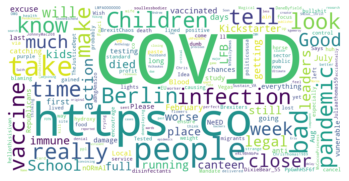

In [102]:
# Enter your code to draw WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(all_tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We are curious about the context of 'vaccine'. 
You can search dataframe like below:

In [93]:
df[df["text"].str.contains("vaccine", na=False)]

,user,created_at,location,text
13,RNS,2021-08-30 15:15:00,USA,A spokesman for Myanmar’s military-installed g...
15,HealthyCollier,2021-08-30 15:15:00,NaN,"Crush COVID, Collier! Get your #COVID19 vaccin..."
17,SETADC,2021-08-30 15:15:00,"Washington, DC",Turkey’s three largest cities now fall under t...
18,SpecNews1SoCal,2021-08-30 15:15:00,"Los Angeles, CA","""During this period of high transmission, prot..."
34,IvorGoodbody,2021-08-30 15:14:57,NaN,#Covid sceptic dies of #Covid in hospital at t...
38,DeannaSpingola,2021-08-30 15:14:55,https://screeningsandyhook.net,Refusing the COVID vaccine; setting the record...
39,Tempegov,2021-08-30 15:14:55,"Tempe, AZ 85280",Don’t Wait. Vaccinate. Today at Laird School C...
46,TodayHeadline42,2021-08-30 15:14:54,United States,"Reuters gives insight into how Pfizer, Moderna..."
55,HarryAu05753100,2021-08-30 15:14:51,NaN,@DaveNaylor18 @MickWest A review of the topic ...
56,Brayden_3smith3,2021-08-30 15:14:51,Hell,"From our economy, to the Middle East, Covid an..."


,Unnamed: 0,user,tweetid,created_at,retweet_count,text
2,2,UKModelWHO,1419421901638848513,Sun Jul 25 22:18:47 +0000 2021,5,Apply NOW for a delegate position at @ParisWHO...


### Exercise 4 - Let's compare two hashtags

People use hashtags to discuss a certain topics and to express their opinions. For example, in the discussion of vaccination, pro-vaccine people have used #vaccinessavelives and anti-vaccine people have used #mybodymychoice. By collecting tweets including those hashtag, you can understand what people are talking about pro-vaccine or anti-vaccine issue. In this exercise, you will collect tweets about vaccination and analyze the differences between the two groups. 

Please collect tweets using two different hahstags: **#vaccinessavelives** and **#mybodymychoice**, which are *opposing* to each other, and then draw wordclouds to compare the context around the two hashtags. Please note that you don't need to add # for the keyword when searching.  


1) Create a function named ```searchTweet``` whose input is ```search_words```, ```date_since```, and ```max_tweets```, and output is a file named ```tweets_{search_words}.jsons``` where it stores tweets in a JSON format. 

2) Create a fuction named ```parseTweet``` whose input is ```search_words``` and output is a file named ```simple_stream_tweets_{search_words}.tsv,``` which is tab-separated file and includes the following tweet information, ```tweetid```, ```user_screen_name```, ```created_at```, and ```text.``` 

2) Collect tweets for two hashtags: #vaccinessavelives and #mybodymychoice for the last 3-7 days with max_tweets=100. 

3) Draw word clouds for each hashtagh. You can create a function named ```drawWordcloud``` whose input is ```search_words``` and output is the plot. 


In [ ]:
# # Import relevant libraries
# import pandas as pd
# import json 
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# import tweepy
# from tweepy import OAuthHandler

# # Consumer/Access key/secret/token obtained from Twitter
# # You should have created a Twitter app and gotten these keys.
# # Do NOT share your key/secret/token with other students.
# consumer_key    = ''
# consumer_secret = ''
# access_token    = ''
# access_secret   = ''

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# # This line finally calls Twitter's Rest API.
# api = tweepy.API(auth)

# try:
#     api.verify_credentials()
#     print("Authentication OK")
# except Exception as e:
#     print("Error during authentication:", e)


In [ ]:
def searchTweet(search_words, date_since, max_tweets):

    # set location for files to be saved
    mypath = "."
    tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(max_tweets)

    # Write data into a file
    filename = f"{mypath}/tweets_{search_words}.jsons"
    with open(filename, "w") as output:
        for tweet in tweets:
            myjson = tweet._json
            output.write(json.dumps(myjson)+"\n")
 
    

In [ ]:
def parseTweet(search_words):
    infilename = f"{mypath}/tweets_{search_words}.jsons"
    outfilename = f"{mypath}/simple_search_tweets_{search_words}.tsv" 
    with open(infilename) as fi, open(outfilename, 'w') as output:
        # Write header in the file to load the file into dataframe
        output.write("\t".join(['tweetid', 'user_screen_name', 'created_at', 'text'])+"\n")

        for line_cnt, line in enumerate(fi):
            try:
                tweet = json.loads(line.strip())
            except: # The last json is not complate 
                continue

            if 'limit' in tweet:
                continue

            tweetid = tweet['id']

            created_at = tweet['created_at']
            user_screen_name = tweet['user']['screen_name']

            text = tweet['full_text']

            text = " ".join(text.split())

            output.write("\t".join([str(tweetid), user_screen_name, created_at, text])+"\n")   

In [ ]:
date_since = "2021-08-23" 
max_tweets = 100

In [ ]:
search_words = "vaccinessavelives"
searchTweet(search_words, date_since, max_tweets)
parseTweet(search_words)

In [ ]:
search_words = "mybodymychoice"
searchTweet(search_words, date_since, max_tweets)
parseTweet(search_words)

In [ ]:
def drawWordcloud(search_words):
    infilename = f"{mypath}/simple_search_tweets_{search_words}.tsv" 
    df = pd.read_csv(infilename, sep="\t")
    print(df.shape)

    # this will concatenate all rows in df['text'] and return one single sentence!
    all_tweets = " ".join([one_row for one_row in df['text']])

    # Enter your code to draw WordCloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=500).generate(all_tweets)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

(100, 4)


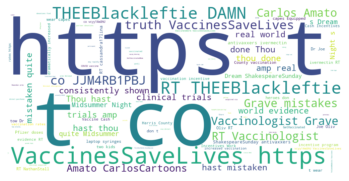

In [ ]:
search_words = "vaccinessavelives"
drawWordcloud(search_words)


(100, 4)


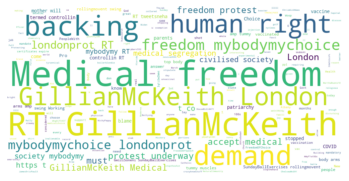

In [ ]:
search_words = "mybodymychoice"
drawWordcloud(search_words)


## 5) Streaming API [Optional]

For details of Streaming API, see [Twitter Streaming API Documentation](https://developer.twitter.com/en/docs/tweets/filter-realtime/overview)

Step 1: Creating a StreamListener

`on_data()` is called when new data comes in


In [ ]:
class MyStreamListener(tweepy.StreamListener):

    """ A listener handles tweets are the received from the stream.
    This is a basic listener that just prints received tweets to stdout.

    """
    def on_data(self, data):
        myjson=data[:-1]
        myoutput.write(myjson+"\n")
        return True

    def on_error(self, status):
        print ("Error", status)


Step 2: Creating a Stream

In [ ]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener, tweet_mode='extended')


You need to stop the process before it collects too much data!!

In [ ]:
keyword = 'covid'

myfilename = f'{mypath}/stream_tweets_{keyword}.jsons'
myoutput = open(myfilename, 'w')

while True:
    try:
        # myStream.filter(track=['coronavirus', 'covid', 'chinese virus', 'wuhan', 'ncov', 'sars-cov-2', 'koronavirus', 'corona', 'cdc', 'N95', 'kungflu', 'epidemic', 'outbreak', 'sinophobia', 'china', 'pandemic', 'covd'])
        myStream.filter(track=[keyword])

    except Exception as e:
        raise


In [ ]:
outfilename = f"{mypath}/simple_stream_tweets_{keyword}.tsv" 

with open(myfilename) as fi, open(outfilename, 'w') as output:
    # Write header in the file to load the file into dataframe
    output.write("\t".join(['user_screen_name', 'tweetid', 'created_at', 'text'])+"\n")
    
    for line_cnt, line in enumerate(fi):
        try:
            tweet = json.loads(line.strip())
        except: # The last json is not complate 
            continue
        
        if 'limit' in tweet:
            continue
        
        tweetid = tweet['id']
        
        created_at = tweet['created_at']
        user_screen_name = tweet['user']['screen_name']

        # Extract Tweet text from Streaming API when in Extended Mode 
        text = tweet['text']
        try:
            text = tweet['extended_tweet']['full_text']
        except:
            pass

        # Below line will remove all tabs and line breaks from text
        text = " ".join(text.split())

        output.write("\t".join([user_screen_name, str(tweetid), created_at, text])+"\n")


In [ ]:
infilename = f"{mypath}/simple_stream_tweets_{keyword}.tsv" 
df = pd.read_csv(infilename, sep="\t")
print(df.shape)
df.head()